In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [2]:
input_file = 'http://bit.ly/315EqiY'
df=pd.read_csv(input_file, sep=' ', header=None)
df.head()

,0,1
0,6.240561,4.732636
1,4.117382,5.196320
2,3.785555,5.857509
3,4.493608,3.132839
4,4.677196,4.708820


In [3]:
kmeansModel = KMeans(n_clusters=3, random_state=0).fit(df)

In [4]:
kmeansModel

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [5]:
kmeansModel.cluster_centers_

array([[ 5.16458397,  5.03103274],
       [ 9.56460123, 10.36706413],
       [ 2.1412337 ,  2.03188558]])

In [6]:
kmeansModel.predict ([[1,3]])

array([2])

In [7]:
kmeansModel.predict([[6, 7], [11, 8]])

array([0, 1])

In [8]:
kmeansModel.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
list(kmeansModel.labels_).count(1)

47

In [11]:
kmeansModel.inertia_

522.5242462216626

In [12]:
km2 = KMeans(n_clusters=3, random_state=0, n_init=1, tol = 1).fit(df) 
km2.inertia_

530.7298007342295

In [13]:
kmeansModel.labels_ - km2.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

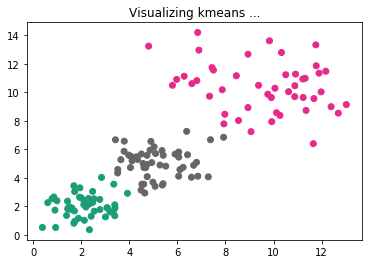

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("Visualizing kmeans ...")
plt.scatter(df[0], df[1], c=kmeansModel.labels_, cmap = 'Dark2_r');

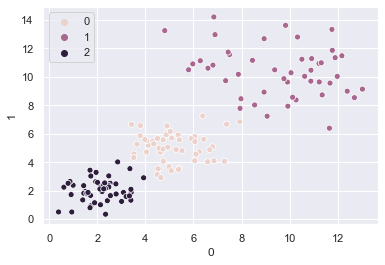

In [16]:
import seaborn as sns
sns.set()
sns.scatterplot(df[0], df[1], hue=km2.labels_);

In [17]:
input_file = 'http://bit.ly/2O7Islk'
all = pd.read_csv(input_file, header=None, sep=',')

In [18]:
true_labels = all[57]

In [20]:
kspam = KMeans(n_clusters=2, random_state=0).fit(all)

import sklearn.metrics as metrics
metrics.confusion_matrix(true_labels,kspam.labels_)

array([[2735,   53],
       [1622,  191]], dtype=int64)

In [21]:
kspam.inertia_

943480843.9871844

In [22]:
#Use kNN
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel.fit(all, true_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [23]:
label_predict_0 = knnModel.predict(kspam.cluster_centers_[0].reshape(1,-1)); 
label_predict_1 = knnModel.predict([kspam.cluster_centers_[1]]);
label_predict_0, label_predict_1

(array([1], dtype=int64), array([1], dtype=int64))

In [25]:
# Use Random Forest
from sklearn.ensemble import RandomForestClassifier

In [26]:
RFModel = RandomForestClassifier(n_estimators=3, random_state=1).fit(all, true_labels)

In [27]:
label_predict_rf0 = RFModel.predict(kspam.cluster_centers_[0].reshape(1,-1))
label_predict_rf1 = RFModel.predict(kspam.cluster_centers_[0].reshape(1,-1))
label_predict_rf0, label_predict_rf1

(array([0], dtype=int64), array([0], dtype=int64))